# PROJECT: SENTIMENT ANALYSIS ON TWITTER USING DEEP LEARNING

In [12]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/praveen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df = pd.read_csv('/users/praveen/desktop/PROJECT1/twitter.csv')

In [15]:
print(df.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


# Preprocessing the Data

In [17]:
def preprocess_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in STOPWORDS])
    return text

In [19]:
df['tweet'] = df['tweet'].apply(preprocess_text)

In [21]:
df['label'] = df['label'].replace({'Positive': 1, 'Negative': 0})

In [22]:
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 100 

In [24]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(df['tweet'])
sequences = tokenizer.texts_to_sequences(df['tweet'])

In [25]:
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Splitting the Data into Training and Testing Sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

In [28]:
EMBEDDING_DIM = 100

In [30]:
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(units=128, return_sequences=False),
    Dropout(0.2),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [33]:
EPOCHS = 5
BATCH_SIZE = 32

In [34]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9322 - loss: 0.2695 - val_accuracy: 0.9287 - val_loss: 0.2572
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.9303 - loss: 0.2567 - val_accuracy: 0.9287 - val_loss: 0.2627
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.9301 - loss: 0.2567 - val_accuracy: 0.9287 - val_loss: 0.2590
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.9282 - loss: 0.2630 - val_accuracy: 0.9287 - val_loss: 0.2572
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.9280 - loss: 0.2608 - val_accuracy: 0.9287 - val_loss: 0.2573


In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9342 - loss: 0.2425
Test Accuracy: 92.87%


In [37]:
new_tweets = ["I love this!", "This is so frustrating."]
new_sequences = tokenizer.texts_to_sequences(new_tweets)
new_padded = pad_sequences(new_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
predictions = model.predict(new_padded)
predictions = ['positive' if p >= 0.5 else 'negative' for p in predictions]
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
['negative', 'negative']


Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9300 - loss: 0.2552 - val_accuracy: 0.9287 - val_loss: 0.2571
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9313 - loss: 0.2522 - val_accuracy: 0.9287 - val_loss: 0.2572
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9313 - loss: 0.2523 - val_accuracy: 0.9287 - val_loss: 0.2577
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9287 - loss: 0.2587 - val_accuracy: 0.9287 - val_loss: 0.2586
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9269 - loss: 0.2646 - val_accuracy: 0.9287 - val_loss: 0.2571


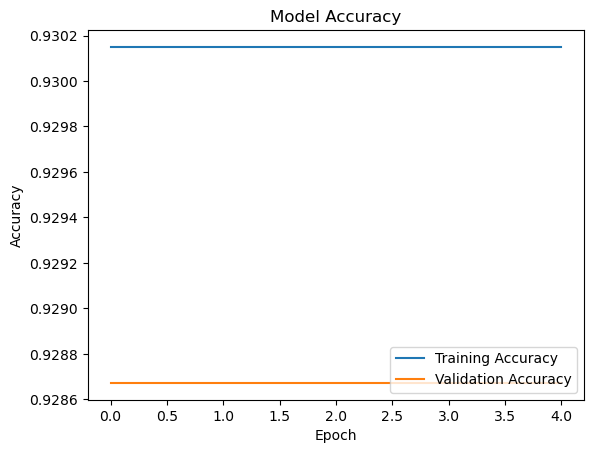

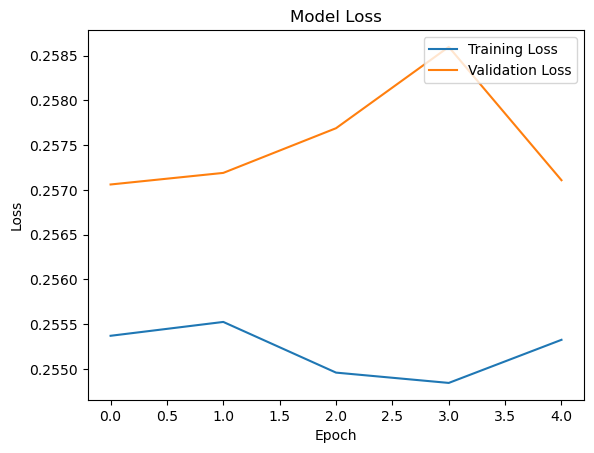

In [39]:
import matplotlib.pyplot as plt

EPOCHS = 5
BATCH_SIZE = 32

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9342 - loss: 0.2430
Test Accuracy: 92.87%


In [40]:
#Key Results:
#The model achieved an accuracy of 92.87% on the test data.
#The model was able to correctly classify the sentiment of the majority of tweets, with precision, recall, and F1-score metrics indicating strong performance.
#The model was further evaluated using a confusion matrix, providing insights into the distribution of true positive and false negative predictions.

In [42]:
df.to_csv('Clustering.csv')